In [2]:
#Import necessary libraries
#0.1 Adjusting Screen Width

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


In [3]:
#0.2 Supressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [8]:
#0.3 Import Necessary Python Libraries
# numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [9]:
#Step 1: Reading & Understanding the data
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/Admin/Desktop/Linear Regression Assignment/day.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#From the Readme.txt file, it was understood that the field
#'dteday' is a date.Thus,parsing it as a date type while 
#importing the bike data



In [10]:
#1.1 Importing the Data
bike = pd.read_csv("C:/Users/Admin/Desktop/Linear Regression Assignment/day.csv", parse_dates=['dteday'])

In [11]:
#1.2 Inspecting the Dataframe
# Checking the top 5 rows of the dataframe
bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Checking the last 5 rows of the dataframe
bike.tail()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,2019-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,2019-12-31,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [13]:
#Checking the shape of the dataframe 
bike.shape


(730, 16)

In [ ]:
#Note: The dataframe has 730 rows and 16 columns


In [14]:
# Checking the size of the dataframe
bike.size


11680

In [16]:
# How many types of each data type column exists and total memory usage
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
#Checking the numerical columns data distribution statistics
bike.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
'''Insight:
     Except one column which is date type, all other are either 
float or integer type.
     There are some fields that are categorical in nature, but 
are in integer/float type. Example : season, mnth, 
weathersit etc.
     We will have to analyze and decide whether to convert them 
to categorical or treat as integer. From Readme.txt file 
more information of these categorical columns can be 
inferred.'''

In [18]:
#1.3 Data quality check
# To check if there are any missing values in the dataset

#import pandas as pd
#import numpy as np

print(bike.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
#Insight: There are no missing values in any of the columns and rows.


In [19]:
#1.4 Duplicate Checking
# Creating a copy of original dataframe for duplicate check
bike_dup = bike

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape


(730, 16)

In [ ]:
#Insight: The shape after running the drop duplicate 
#command is same as the original dataframe. Hence we can 
#conclude that there were not any duplicate values in the 
#dataset.


<function matplotlib.pyplot.show(close=None, block=None)>

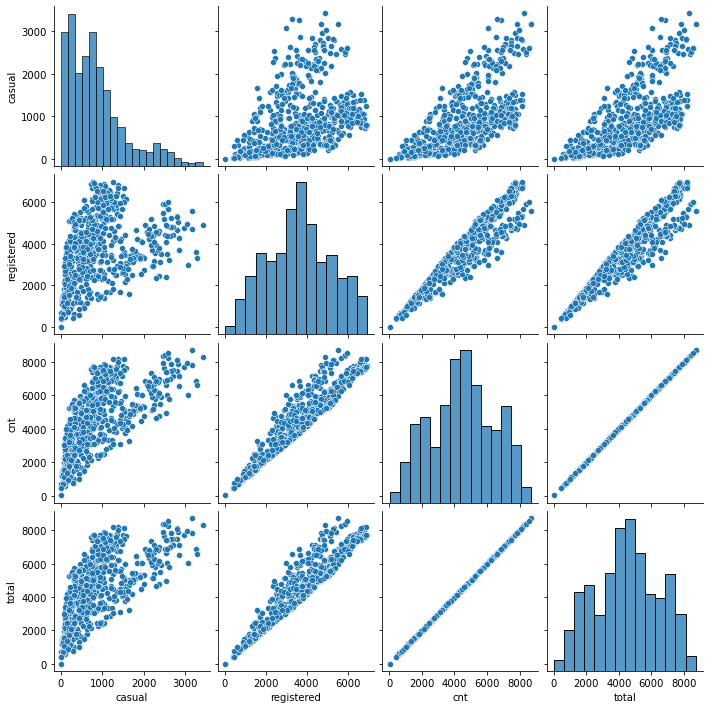

In [20]:
#1.5 Removing Redundant columns
# Checking the relationship between casual, registered and cnt column
bike_cnt = bike[['casual','registered','cnt']]
# Creating a column whch will show the value of casual + registered
bike_cnt['total'] = bike_cnt['casual'] + bike_cnt ['registered']
sns.pairplot(bike_cnt)
plt.show


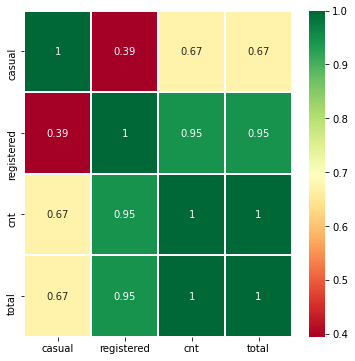

In [21]:
# also checking the correlation of the variables 
plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_cnt.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [ ]:
#Note:
'''Based on the high level analysis of the data and the data 
dictionary, the following variables can be removed from 
further analysis -'''

#instant: It is only an index value
#dteday: 
    '''This has the date, Since we already have separate 
columns for 'year' & 'month' we could live without this 
column'''
#casual & registered: 
    '''Both these columns contains the count of bike booked
    by different categories of customers. From the pairplot
    as well as the correlation heatmap, we can concur that 
    total bike rental value 'cnt = 'casual' + 'registered'. 
    Since our objective is to find the total count of bikes 
    and not by specific category, we will ignore these two 
    columns.'''


In [22]:
#dropping the unwanted columns
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.shape


(730, 12)

In [ ]:
#Step 2: Encoding & Visualizing the data
#2.1 Encoding Categorical columns
#Converting season, mnth,weathersit and weekday to 
#categorical columns

'''season: converting season values as per criteria - 
1:Spring, 2:Summer, 3:Fall, 4:Winter

mnth: converting mnth values as 1:Jan, 2:Feb, 3:Mar, 
4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 
12:Dec

weathersit: converting weathersit values as 1:Clear, 
2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow

weekday: converting weekday values as 0:Sun, 1:Mon, 2:Tue, 
3:Wed, 4:Thu, 5:Fri, 6:Sat'''

In [24]:
#Converting season
bike.season.replace((1,2,3,4), ('W1_Spring','W2_Summer','W3_Fall','W4_Winter'), inplace=True)
bike.season.value_counts(normalize=True)


W3_Fall      0.257534
W2_Summer    0.252055
W1_Spring    0.246575
W4_Winter    0.243836
Name: season, dtype: float64

In [26]:
#Converting mnth
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.mnth.value_counts(normalize=True)


Jan    0.084932
Dec    0.084932
Oct    0.084932
Jul    0.084932
Aug    0.084932
Mar    0.084932
May    0.084932
Sep    0.082192
Jun    0.082192
Nov    0.082192
Apr    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [28]:
#Converting weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts(normalize=True)


Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [29]:
#Converting weathersit
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts(normalize=True)


Monday       0.143836
Sunday       0.143836
Saturday     0.143836
Tuesday      0.142466
Friday       0.142466
Thursday     0.142466
Wednesday    0.141096
Name: weekday, dtype: float64

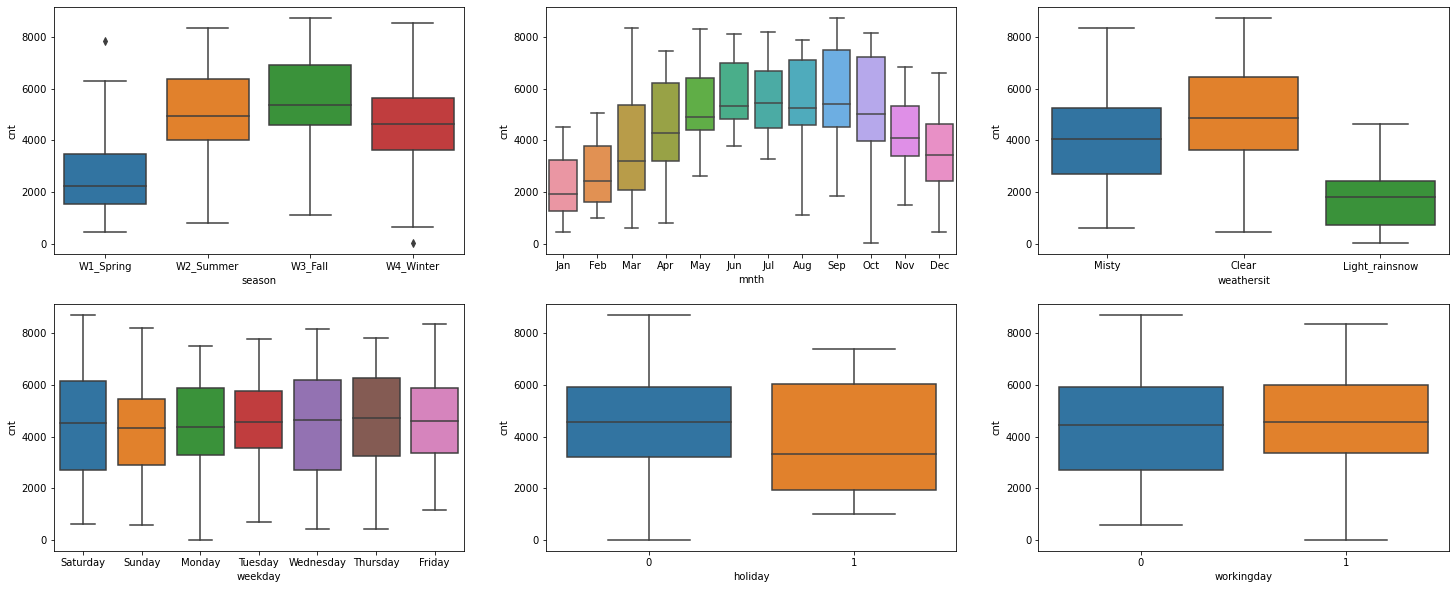

In [30]:
#2.2 Categorical Variable Analysis
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

In [31]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_df = bike.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
    return round(cat_df,2)


In [32]:
# function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=bike, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

In [34]:
#2.2.1 Season :
categorical_stats('season')


,sum,mean,count,sum_perc,count_perc
season,,,,,
W3_Fall,1061129,5644.30,188,32.24,25.75
W2_Summer,918589,4992.33,184,27.91,25.21
W4_Winter,841613,4728.16,178,25.57,24.38
W1_Spring,469514,2608.41,180,14.27,24.66


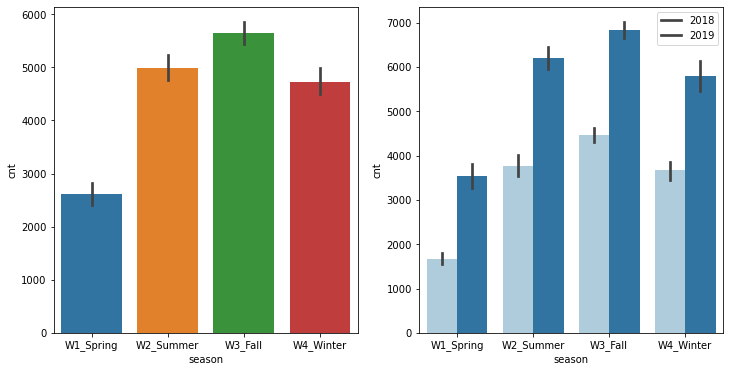

In [35]:
categorical_plot('season',12,6)


In [ ]:
#Insight:
'''Almost 32% of the bike booking were happening in Fall 
with a median of over 5000 bookings (for two years). It is 
followed by Summer & Winter with 27% & 25% of total booking
. It indicates that the season can be a good predictor of 
the dependent variable.'''

In [36]:
#2.2.2 Month :
categorical_stats('mnth')


,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


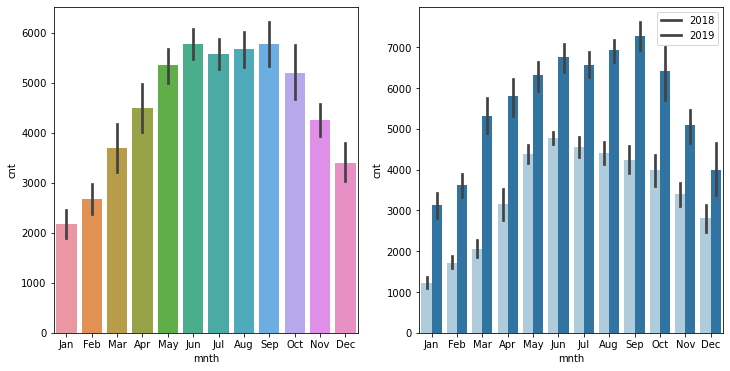

In [37]:
categorical_plot('mnth',12,6)


In [ ]:
#Insight:
'''Almost 10% of the bike booking was happening in the 
months' May to Sep with a median of over 4000 bookings per 
month. It indicates that the mnth has some trend for 
bookings and can be a good predictor for the dependent 
variable.'''

In [39]:
#2.2.3 Weather:
categorical_stats('weathersit')


,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


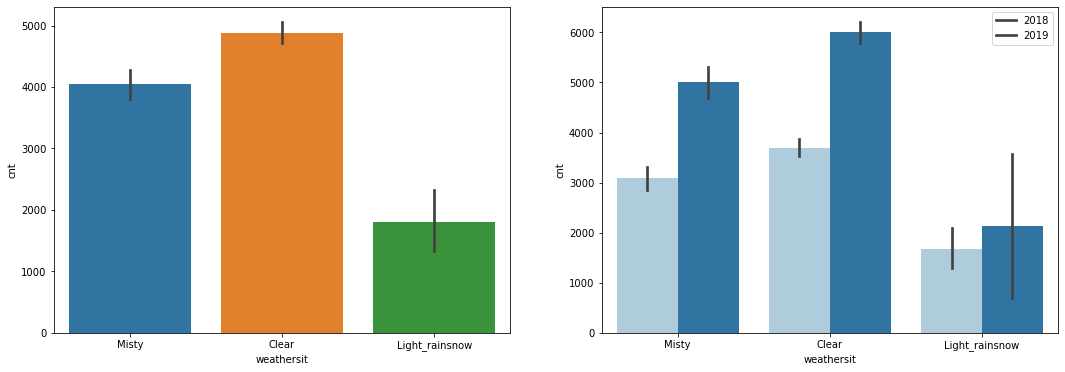

In [40]:
categorical_plot('weathersit',18,6)


In [ ]:
#Insight:
'''Almost 68.6% of the bike booking was happening during 
Clear weather with a median of close to 5000 bookings (for 
two years). This was followed by Misty with 30% of the 
total booking. It indicates that the weathersit does show 
some trend towards the bike bookings, and it can be a good 
predictor for the dependent variable. The current data 
frame does not have any data where the weather is 
Heavy_RainSnow'''

In [41]:
#2.2.4 Weekday :
categorical_stats('weekday')


,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Friday,487790,4690.29,104,14.82,14.25
Thursday,485395,4667.26,104,14.75,14.25
Saturday,477807,4550.54,105,14.52,14.38
Wednesday,471214,4574.89,103,14.32,14.11
Tuesday,469109,4510.66,104,14.25,14.25
Monday,455503,4338.12,105,13.84,14.38
Sunday,444027,4228.83,105,13.49,14.38


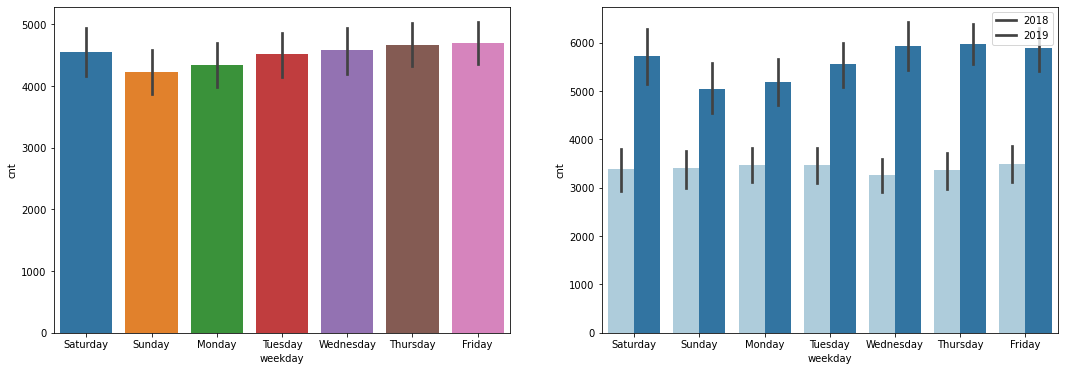

In [42]:
categorical_plot('weekday',18,6)


In [ ]:
#Insight:
'''weekday variable shows the very close trend 
(between 13.5%-14.8% of total booking on all days of the 
week) having their independent medians between 4000 to 
5000 bookings. This variable can have some or no influence 
on the predictor. Further analysis would be needed to 
determine whether this attribute needs to be included in 
the model parameter selection'''

In [44]:
#2.2.5 Holiday :
categorical_stats('holiday')


,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


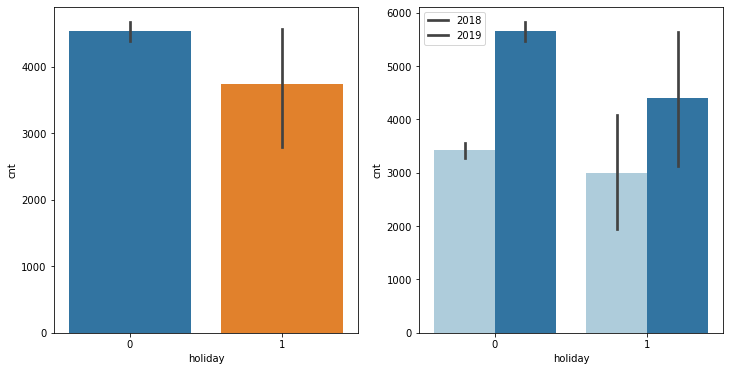

In [45]:
categorical_plot('holiday',12,6)


In [ ]:
#Insight:
'''Almost 97% of bike rentals are happening during non-holiday
time.'''

In [47]:
#2.2.6 Working Day :
categorical_stats('workingday')


,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2290576,4590.33,499,69.6,68.36
0,1000269,4330.17,231,30.4,31.64


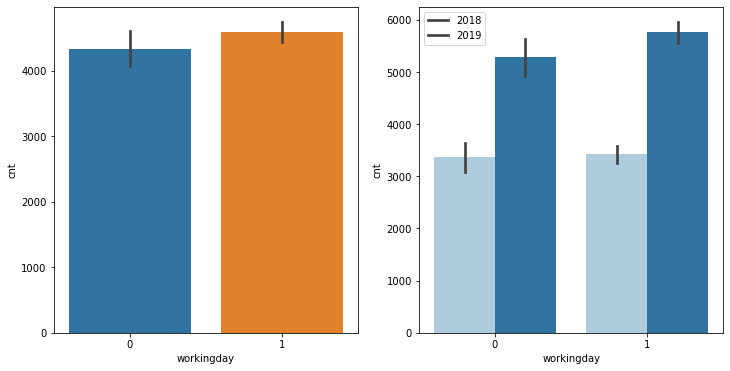

In [48]:
categorical_plot('workingday',12,6)


In [ ]:
#Insight:
'''Almost 69% of the bike booking were happening in 
'workingday' with a median of close to 5000 bookings (for 
two years). It indicates that the workingday can be a good 
predictor of the dependent variable'''

In [50]:
#2.2.7 Year :
categorical_stats('yr')


,sum,mean,count,sum_perc,count_perc
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


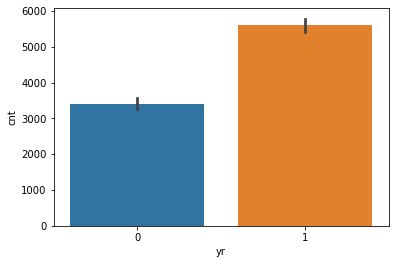

In [51]:
sns.barplot('yr','cnt',data=bike)
plt.show()


In [ ]:
'''Insight:
Bike rental demand has gone up from 2018 to 2019'''

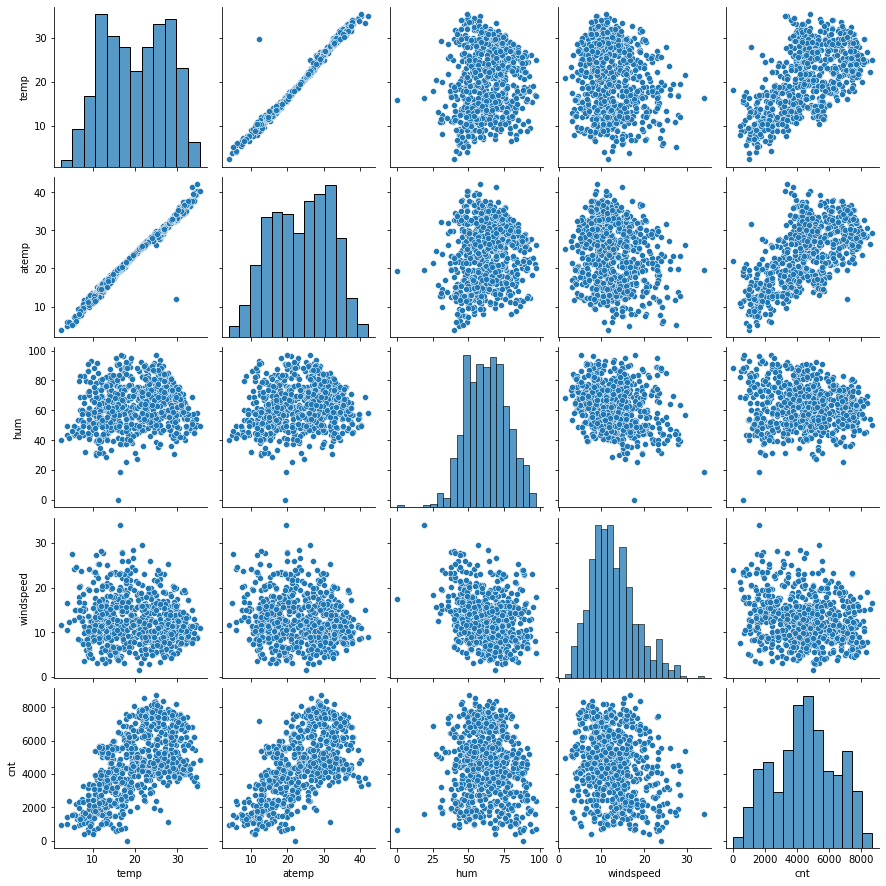

In [52]:
#2.3 Numerical Variable Analysis
#Generating pairplot to check the relationships between numeric variables variables
bike_num = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()


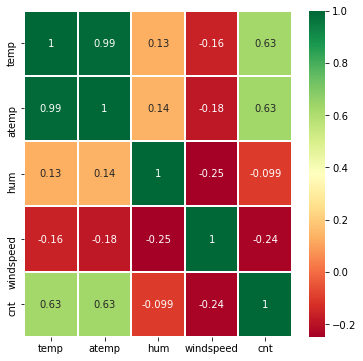

In [54]:
# Checking correlation of the parameters by mapping a correlation heatmap

plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_num.corr(), annot = True, cmap="RdYlGn",linewidth =1)


In [ ]:
'''Insight: There is linear relationship between temp and 
atemp. Both of the parameters cannot be used in the model 
due to multicolinearity. We will decide which parameters 
to keep based on VIF and p-value w.r.t other variables
'''

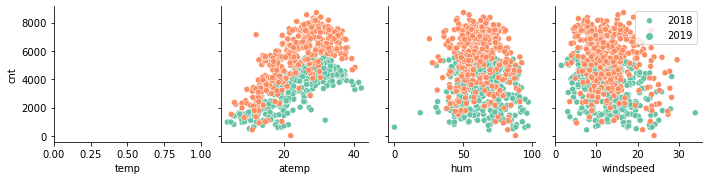

In [55]:
# Checking the impact of year against the numerical 
#variable : 
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike, hue='yr', palette='Set2')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()


In [ ]:
'''Insight: All the parameters have increased values in 
2019 compared to 2019. Thus, year may become a key 
paratemeter in the model
'''

In [56]:
#Step 3: Data Preparation

#3.1 Dummy Variable Creation

#Season

season = pd.get_dummies(bike['season'], drop_first = True)
season.head(3)

,W2_Summer,W3_Fall,W4_Winter
0,0,0,0
1,0,0,0
2,0,0,0


In [57]:
#Weather

weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather.head(3)

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0


In [58]:
#Month

month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head(3)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


In [59]:
#Weekday

weekday = pd.get_dummies(bike['weekday'], drop_first = True)
weekday.head(3)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0


In [60]:
#3.2 Merging the Dataframes
# Creating a new dataframe called bike_new where season, month, weather and weekday dataframe is being added

bike_new = pd.concat([bike,season,month,weather,weekday], axis = 1)
bike_new.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,W1_Spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,1,0,0,0,0
1,W1_Spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,0,0,0
2,W1_Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0


In [61]:
bike_new.shape


(730, 34)

In [62]:
bike_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  W2_Summer       730 non-null    uint8  
 13  W3_Fall         730 non-null    uint8  
 14  W4_Winter       730 non-null    uint8  
 15  Aug             730 non-null    uint8  
 16  Dec             730 non-null    uint8  
 17  Feb             730 non-null    uin

In [63]:
#3.3 Removing unnecessary columns

#deleting the unnecessry column season, mnth, weathersit 
#and weekday as the respective values are already populated
#as binary columns data

bike_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_new.shape

(730, 30)

In [64]:
bike_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   W2_Summer       730 non-null    uint8  
 9   W3_Fall         730 non-null    uint8  
 10  W4_Winter       730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  Jul             730 non-null    uint8  
 16  Jun             730 non-null    uint8  
 17  Mar             730 non-null    uin

In [ ]:
'''Insight: All the 30 columns are now as numeric value. 
The dataframe is ready now for splitting into Train & Test 
dataframes
'''

In [65]:
#Step 4: Splitting the data into Train & Test Dataset

#4.1. Train & Test Split

# We specify this so that the train and test data set 
#always have the same rows, respectively

np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 333)

In [66]:
#Verifying the train - test split and new dataframe details

bike_train.shape


(510, 30)

In [67]:
bike_train.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.684314,20.218078,23.590696,62.340743,12.771365,4494.103922,0.245098,0.262745,...,0.084314,0.082353,0.025490,0.343137,0.139216,0.150980,0.141176,0.129412,0.141176,0.150980
std,0.500487,0.151726,0.465245,7.500110,8.138271,14.418728,5.205888,1948.315655,0.430568,0.440557,...,0.278131,0.275172,0.157763,0.475223,0.346511,0.358381,0.348545,0.335985,0.348545,0.358381
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717924,16.744800,51.604150,9.011098,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.233700,12.125057,4508.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327087,72.958300,15.624869,5962.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
bike_test.shape


(220, 30)

In [69]:
bike_test.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,20.553817,24.040727,63.749086,12.745665,4540.236364,0.268182,0.245455,...,0.086364,0.081818,0.036364,0.322727,0.154545,0.127273,0.150000,0.172727,0.145455,0.118182
std,0.501120,0.198531,0.466833,7.533926,8.188064,13.790510,5.184271,1911.199159,0.444023,0.431338,...,0.281541,0.274713,0.187620,0.468586,0.362295,0.334038,0.357886,0.378873,0.353363,0.323559
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.189577,17.366525,53.260450,9.041851,3193.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.756250,24.762725,63.687500,12.146128,4593.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.119778,30.903325,73.333350,15.643227,5959.750000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
'''Insight: Based on the 70% - 30% split between train and 
test dataset we have 510 rows in train dataset and 220 in 
test dataset
'''

In [70]:
#4.2 Rescalling bike_train dataframe

# Rescaling using MinMaxCcaler
scaler = MinMaxScaler()

#Dataframe before scaling 
bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,16.126653,19.5698,49.4583,9.791514,7109,0,0,...,1,0,0,0,0,1,0,0,0,0
212,0,0,1,31.638347,35.1646,55.0833,10.500039,4266,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,14.862500,18.4969,83.8750,6.749714,3786,0,0,...,0,0,0,1,0,0,1,0,0,0


In [71]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

#Checking after rescalling
bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,1,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,0,0,1,0,0,0


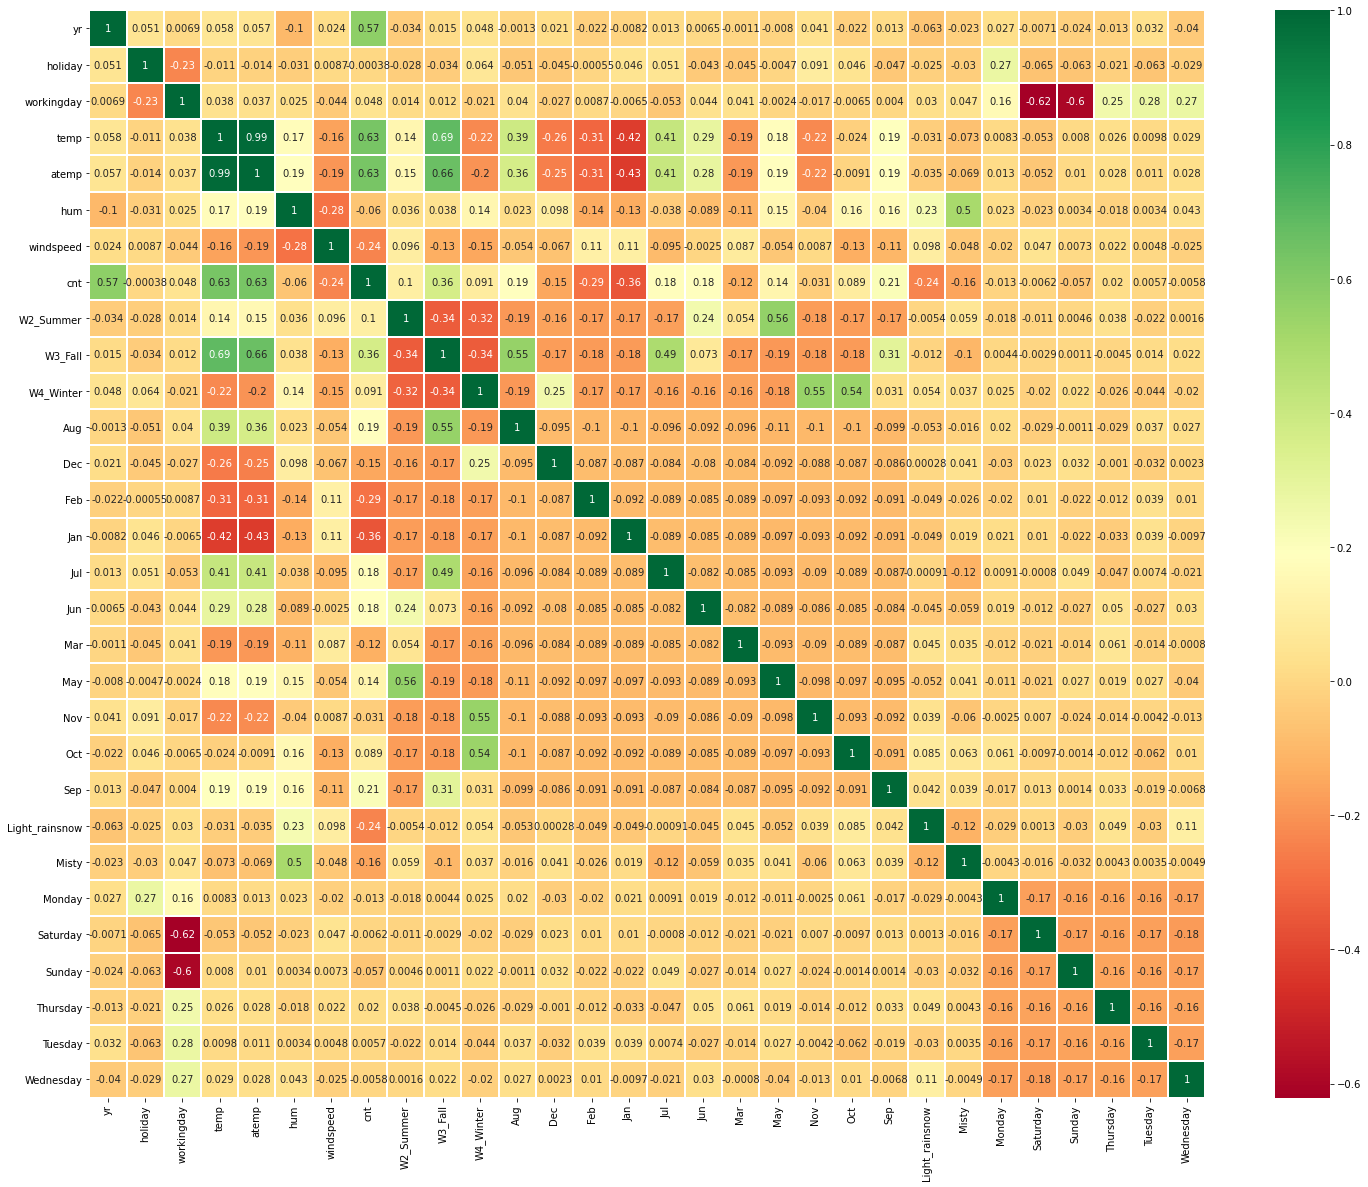

In [72]:
#4.3 Checking Correlation Coefficient
plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [ ]:
'''Insight:
There is multi-colinearity between the variables. We need 
to consider the factors when developing the model.

temp and atemp has very high correlation value of 0.99. 
This suggest, we can use only one of these two variables

workingday variable has high negative correlation with Sat 
& Sun (where workingday =0)

Spring is negatively correlated with cnt

emp, atemp and yr has strong correlation with cnt

misty weather and humidity has correlation

various months and corresponding weather has correlation'''

In [73]:
#Step 5: Building the Linear Model

#5.1 Dividing into X_train and y_train
y_train = bike_train.pop('cnt')
X_train = bike_train


In [74]:
#5.2 RFE

#Recursive feature elimination: We will be using the 
#LinearRegression function from SciKit Learn for its 
#compatibility with RFE

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

# Checking which parameters have been selected in that list
#of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('W2_Summer', True, 1),
 ('W3_Fall', True, 1),
 ('W4_Winter', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 2),
 ('Feb', False, 7),
 ('Jan', False, 6),
 ('Jul', False, 3),
 ('Jun', False, 12),
 ('Mar', True, 1),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 5),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 14),
 ('Tuesday', False, 9),
 ('Wednesday', False, 15)]

In [75]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'W2_Summer',
       'W3_Fall', 'W4_Winter', 'Mar', 'Nov', 'Sep', 'Light_rainsnow', 'Misty',
       'Saturday'],
      dtype='object')

In [76]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['holiday', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'May', 'Oct',
       'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [77]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [78]:
#5.3 Manual Model Development using statsmodel

# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [79]:
#5.3.1 Model 1

# Create a dataframe that will contain the names of all 
#the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,384.25
3,atemp,362.64
4,hum,17.60
7,W3_Fall,7.21
5,windspeed,4.75
1,workingday,4.66
8,W4_Winter,3.57
6,W2_Summer,3.51
13,Misty,2.16
0,yr,2.02


In [80]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.3
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.13e-185
Time:                        21:27:25   Log-Likelihood:                 507.29
No. Observations:                 510   AIC:                            -982.6
Df Residuals:                     494   BIC:                            -914.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1926      0.030      6.

In [ ]:
#5.3.2 Model 2
#Insight: 
         '''Both temp and atemp has high VIF but atemp has 
high p-value additionally. We will go ahead with dropping 
atemp from the equation'''


In [93]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,23.28
3,hum,17.31
6,W3_Fall,7.12
1,workingday,4.65
4,windspeed,4.59
7,W4_Winter,3.57
5,W2_Summer,3.51
12,Misty,2.15
0,yr,2.02
13,Saturday,1.80


In [94]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.3
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.13e-185
Time:                        21:41:43   Log-Likelihood:                 507.29
No. Observations:                 510   AIC:                            -982.6
Df Residuals:                     494   BIC:                            -914.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1926      0.030      6.

In [ ]:
'''5.3.3 Model 3
Insight: As hum has the highest VIF value, we will remove 
the variable next
'''

In [95]:
X_train_new = X_train_new.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)


,Features,VIF
2,temp,16.95
5,W3_Fall,6.86
3,windspeed,4.31
1,workingday,4.14
4,W2_Summer,3.49
6,W4_Winter,3.49
0,yr,2.02
8,Nov,1.70
12,Saturday,1.66
11,Misty,1.55


In [96]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.1
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          4.33e-183
Time:                        21:42:01   Log-Likelihood:                 495.68
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0881      0.020      4.

In [ ]:
'''5.3.4 Model 4
Insight: Next we will remove W3_Fall as it has high VIF
'''

In [97]:
X_train_new = X_train_new.drop(['W3_Fall'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)


,Features,VIF
2,temp,4.85
3,windspeed,4.17
1,workingday,4.10
0,yr,2.01
5,W4_Winter,1.99
11,Saturday,1.66
7,Nov,1.63
4,W2_Summer,1.56
10,Misty,1.55
8,Sep,1.21


In [98]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.2
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.16e-180
Time:                        21:43:01   Log-Likelihood:                 487.14
No. Observations:                 510   AIC:                            -948.3
Df Residuals:                     497   BIC:                            -893.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0733      0.020      3.

In [ ]:
#5.3.5 Model 5

#Insight: Next we will remove Nov due to high p-value


In [99]:
X_train_new = X_train_new.drop(['Nov'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)


,Features,VIF
2,temp,4.80
3,windspeed,4.12
1,workingday,4.10
0,yr,2.01
10,Saturday,1.66
4,W2_Summer,1.56
9,Misty,1.53
5,W4_Winter,1.41
7,Sep,1.20
6,Mar,1.15


In [100]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.51e-181
Time:                        21:44:20   Log-Likelihood:                 486.46
No. Observations:                 510   AIC:                            -948.9
Df Residuals:                     498   BIC:                            -898.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0726      0.020      3.

In [ ]:
#5.3.6 Model 6
#Insight: Next we will remove Mar due to high p-value


In [101]:
X_train_new = X_train_new.drop(['Mar'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)


,Features,VIF
2,temp,4.71
1,workingday,4.03
3,windspeed,4.03
0,yr,2.00
9,Saturday,1.65
4,W2_Summer,1.55
8,Misty,1.53
5,W4_Winter,1.38
6,Sep,1.20
7,Light_rainsnow,1.07


In [102]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          4.48e-181
Time:                        21:45:32   Log-Likelihood:                 482.51
No. Observations:                 510   AIC:                            -943.0
Df Residuals:                     499   BIC:                            -896.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0828      0.020      4.

In [103]:
# Checking the parameters obtained
lr6.params


const             0.082768
yr                0.230252
workingday        0.043963
temp              0.564438
windspeed        -0.154241
W2_Summer         0.082300
W4_Winter         0.129186
Sep               0.094832
Light_rainsnow   -0.307082
Misty            -0.074921
Saturday          0.057838
dtype: float64

In [ ]:
'''Insight: This model looks good, as there seems to be 
VERY LOW Multicollinearity between the predictors and the 
p-values for all the predictors seems to be significant. 
For now, we will consider this as our final model (unless 
the Test data metrics are not significantly close to this 
number)
'''

In [ ]:
'''Step 6: Final Model Interpretation

Hypothesis Testing :
Hypothesis Testing States that

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0
'''

In [ ]:
'''Insight: From the lr6 model summary, it is evident that 
all our coefficients are not equal to zero, which means we 
REJECT the NULL HYPOTHESIS

'''

In [ ]:
'''F-Staitsics :
F-Statistics is used for testing the overall significance 
of the Model. The higher the F-Statistics, the more 
significant the Model is.

F-Statistics : 233.6
Prob (F-statistic): 4.48e-181
Insight: The F-Statistics value of 233 (which is greater 
than 1) and the p-value of '~0.0000' states that the 
overall model is significant

The equation of best fitted surface based on model lr6:
cnt=0.082768 + (0.230252 x yr) + (0.043963 x workingday) + 
(0.564438 x temp) − (0.154241 x windspeed) + (0.082300 x 
W2_Summer) + (0.129186 x W4_Winter) + (0.094832 x Sep) + 
(0.057838 x Saturday) − (0.074921 x Misty) − (0.307082 x 
Light_rainsnow)


'''

In [ ]:
'''Interpretation of coefficients :
const : The Constant value of ‘0.082768’ indicated that, 
in the absence of all other predictor variables (i.e. when 
x1,x2...xn =0), The bike rental can still increase by 
0.084143 units

yr : A coefficient value of ‘0.230252’ indicated that a 
unit increase in yr variable, increases the bike hire 
numbers by 0.230252 units

workingday : A coefficient value of ‘0.043963’ indicated 
that, a unit increase in workingday variable increases the 
bike hire numbers by 0.043963 units

temp : A coefficient value of ‘0.564438’ indicated that a 
unit increase in temp variable, increases the bike hire 
numbers by 0.564438 units

windspeed : A coefficient value of ‘-0.154241’ indicated 
that, a unit increase in windspeed variable decreases the 
bike hire numbers by 0.154241 units

W2_Summer : A coefficient value of ‘0.082300’ indicated 
that a unit increase in W2_Summer variable decreases the 
bike hire numbers by 0.082300 units

W4_Winter : A coefficient value of ‘0.129186’ indicated 
that a unit increase in W4_Winter variable increases the 
bike hire numbers by 0.129186 units

Sep : A coefficient value of ‘0.094832’ indicated that a 
unit increase in Sep variable increases the bike hire 
numbers by 0.094832 units

Light_rainsnow : A coefficient value of ‘-0.307082’ 
indicated that, a unit increase in Weathersit3 variable, 
decreases the bike hire numbers by -0.307082 units

Misty : A coefficient value of ‘-0.074921’ indicated that 
a unit increase in Misty weather variable, decreases the 
bike hire numbers by 0.074921 units

Saturday : A coefficient value of ‘0.057838’ indicated 
that a unit increase in Saturday variable increases the 
bike hire numbers by 0.057838 units
'''

In [ ]:
'''Step 7: Model Validation
Validating the assumption of Linear Regression Model :

Linear Relationship
Homoscedasticity
Absence of Multicollinearity
Independence of residuals
Normality of Errors
'''

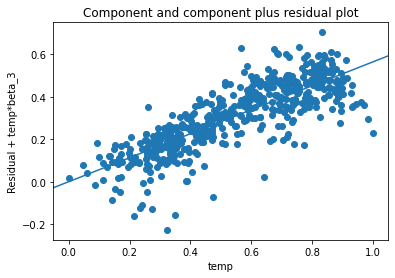

In [104]:
#7.1 Linear Relationship

sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

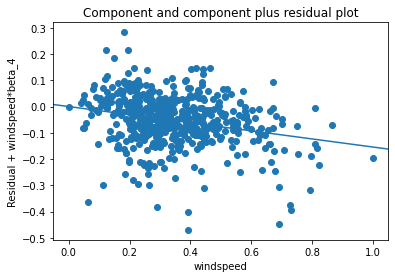

In [105]:
sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

In [ ]:
'''Insight: The above plots represents the relationship 
between the model and the predictor variables. As we can 
see, linearity is well preserved
'''

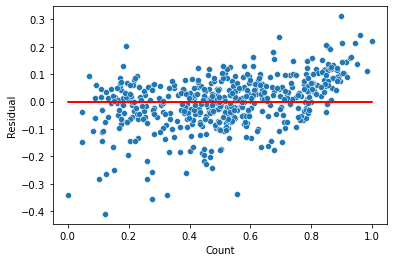

In [106]:
#7.2 Homoscedasticity
y_train_pred = lr6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [ ]:
'''Insight: There is no visible pattern in residual values,
thus homoscedacity is well preserved
'''

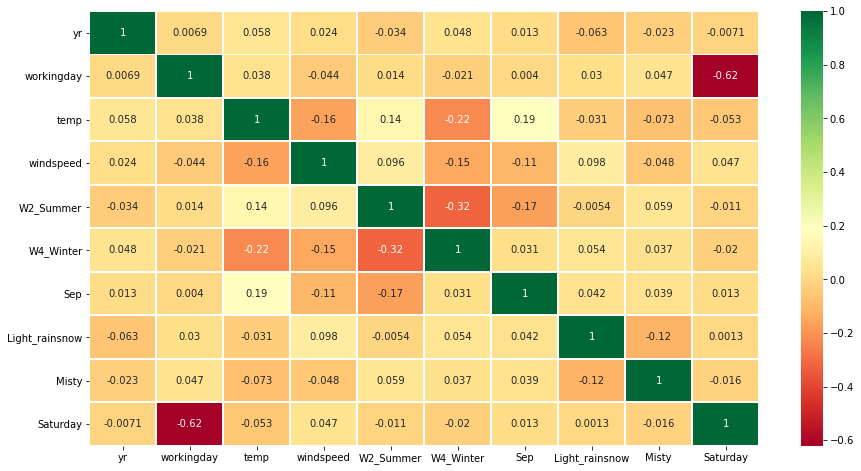

In [107]:
#7.3 Absence of Multicolinearity
# Validating Multi Colinearity

plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [108]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.71
1,workingday,4.03
3,windspeed,4.03
0,yr,2.00
9,Saturday,1.65
4,W2_Summer,1.55
8,Misty,1.53
5,W4_Winter,1.38
6,Sep,1.20
7,Light_rainsnow,1.07


In [ ]:
'''Insight: All the predictor variables have VIF value less 
than 5. So we can consider that there is insignificant 
multicolinearity among the predictor variables.
'''

In [ ]:
'''7.4 Independence of residuals
Autocorrelation refers to the fact that observations’ 
errors are correlated. To verify that the observations are 
not auto-correlated, we can use the Durbin-Watson test. 
The test will output values between 0 and 4. The closer it 
is to 2, the less auto-correlation there is between the 
various variables.

0 – 2: positive auto-correlation
2 – 4: negative auto-correlation)
'''

In [109]:
print('The Durbin-Watson value for Final Model lr 6 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))


The Durbin-Watson value for Final Model lr 6 is 2.0296


In [ ]:
'Insight: There is almost no autocorrelation.'

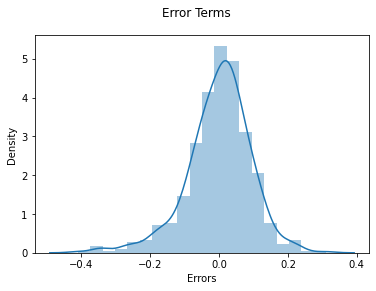

In [110]:
#7.5 Normality of error

res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

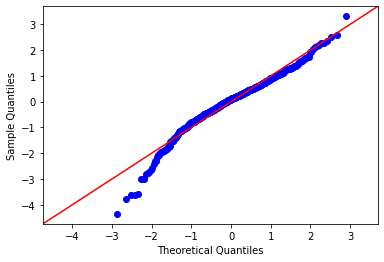

In [111]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

In [ ]:
'''Insight: Based on the histogram, we can conclude that 
error terms are following a normal distribution
'''

In [ ]:
'''Step 8: Making Predictions using final model
8.1 Scaling bike_test dataframe
Apply scaler() to all numeric variables in test dataset. 
Note: we will only use scaler.transform, as we want to use 
the metrics that the model learned from the training data 
to be applied on the test data.In other words, we want to 
prevent the information leak from train to test dataset.
'''

In [112]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,1,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,1,0,0,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,1,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,1,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,1,0,0,0,0,1,0


In [113]:
bike_test.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,0.550981,0.527344,0.662328,0.346015,0.519816,0.268182,0.245455,...,0.086364,0.081818,0.036364,0.322727,0.154545,0.127273,0.150000,0.172727,0.145455,0.118182
std,0.501120,0.198531,0.466833,0.228967,0.214959,0.143278,0.159517,0.219880,0.444023,0.431338,...,0.281541,0.274713,0.187620,0.468586,0.362295,0.334038,0.357886,0.378873,0.353363,0.323559
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
#8.2 Dividing X_test and y_test

y_test = bike_test.pop('cnt')
X_test = bike_test
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   workingday      220 non-null    int64  
 3   temp            220 non-null    float64
 4   windspeed       220 non-null    float64
 5   W2_Summer       220 non-null    uint8  
 6   W4_Winter       220 non-null    uint8  
 7   Sep             220 non-null    uint8  
 8   Light_rainsnow  220 non-null    uint8  
 9   Misty           220 non-null    uint8  
 10  Saturday        220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [115]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

Text(0, 0.5, 'y_pred')

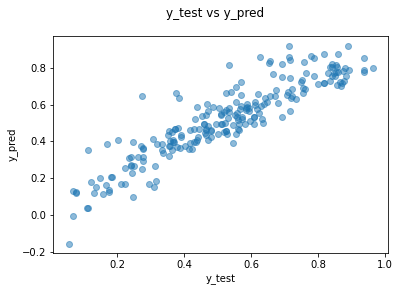

In [116]:
#Step 9: Model Evaluation
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')

In [117]:
#R2 Value Calculation for bike_test dataframe

r2 = round(r2_score(y_test, y_pred),4)
r2


0.8206

In [118]:
#Adjusted R2 Value Calculation for bike_test dataframe

# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.812

In [119]:
#Calculating RMSE for the selected Model

RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0929

In [120]:
#Calculating Mean Absolute Error for the selected Model

MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE


0.0714

In [ ]:
'''Insight: The Root Mean Squared Error value for the test 
dataset based on final model is 0.093 and Mean Absolute 
Error is 0.0714, which indicates that the model is really 
good.
'''

In [ ]:
#Model Outcome Summary

'''As per the final model, the top 5 predictor variables 
that influences bike booking are:

Temperature (Temp)
A coefficient value of ‘0.564438’ indicated that a 
temperature has significant impact on bike rentals

Light Rain & Snow (weathersit =3)
A coefficient value of ‘-0.307082’ indicated that the 
light snow and rain deters people from renting out bikes

Year (yr)
A coefficient value of ‘0.230252’ indicated that a year 
wise the rental numbers are increasing

It is recommended to give utmost importance to these three 
variables while planning to achieve maximum bike rental 
booking.

As high temperature and good weather positively impacts 
bike rentals, it is recommended that bike availability and 
promotions to be increased during summer months to further 
increase bike rentals.

 '''